In [14]:
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
cvs_file = "eval/eval.csv"
df = pd.read_csv(cvs_file)
df

,Desc,R1 diff1,R1 diff2,R2 diff1,R2 diff2,R3 diff1,R3 diff2
0,A bee humming a melody,0,2,0,1,0,1
1,A bee with a propeller instead of wings,0,2,1,1,0,1
2,A bird swimming like a fish,1,0,2,2,1,1
3,A boat sailing on land,1,4,2,4,1,4
4,A butterfly is pulling a train,0,2,0,2,2,1
5,A butterfly with origami wings,0,0,0,0,0,0
6,A cactus growing in a rainforest,3,1,2,2,4,3
7,A candle burning underwater,1,0,2,2,2,0
8,A car driving on clouds,-1,-1,0,0,-1,-2
9,A city skyline made of candy,3,3,2,3,1,1


# Agreement of Raters

In [7]:
R1_diff1 = df['R1 diff1'].tolist()
R1_diff2 = df['R1 diff2'].tolist()
R2_diff1 = df['R2 diff1'].tolist()
R2_diff2 = df['R2 diff2'].tolist()
R3_diff1 = df['R3 diff1'].tolist()
R3_diff2 = df['R3 diff2'].tolist()

raters_diff1 = [R1_diff1, R2_diff1, R3_diff1]
raters_diff2 = [R1_diff2, R2_diff2, R3_diff2]

In [5]:
n = 50
k = 9
m = 3 

In [24]:
def process_multi_cohen_kappa(raters, plot=True, get_data=False):
    # src: https://stackoverflow.com/questions/11528150/inter-rater-agreement-in-python-cohens-kappa
    data = np.zeros((len(raters), len(raters)))
    # Calculate cohen_kappa_score for every combination of raters
    # Combinations are only calculated j -> k, but not k -> j, which are equal
    # So not all places in the matrix are filled.
    for j, k in list(itertools.combinations(range(len(raters)), r=2)):
        data[j, k] = metrics.cohen_kappa_score(raters[j], raters[k])
    
    if plot:
        sns.heatmap(
            data, 
            mask=np.tri(len(raters)),
            annot=True, linewidths=5,
            vmin=0, vmax=1,
            xticklabels=[f"Rater {k + 1}" for k in range(len(raters))],
            yticklabels=[f"Rater {k + 1}" for k in range(len(raters))],
        )
        plt.show()
    
    if get_data:
        return data


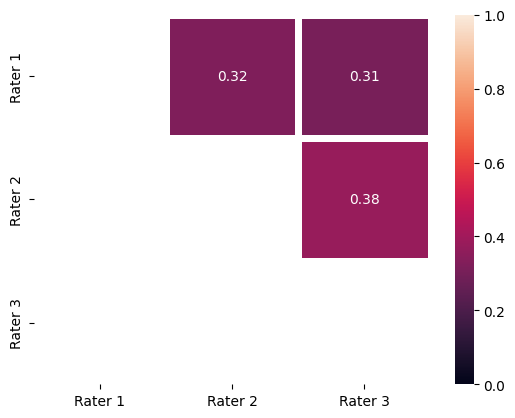

In [25]:
process_multi_cohen_kappa(raters_diff1)

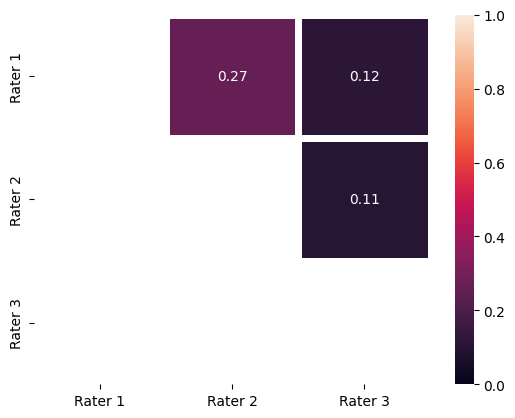

In [26]:
process_multi_cohen_kappa(raters_diff2)